In [1]:
import numpy as np
import pandas as pd
import stan
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('/mrhome/amingk/Documents/7TPD/ActStimRL')
from Madule import utils
import arviz as az
from scipy.stats import gaussian_kde

In [2]:
def MAP(posterior_samples):
    # Estimate density
    kde = gaussian_kde(posterior_samples)

    # Evaluate KDE on a grid
    x = np.linspace(min(posterior_samples), max(posterior_samples), 1000)
    density = kde(x)

    # MAP estimate = location of the maximum density
    map_estimate = x[np.argmax(density)]
    return map_estimate, np.max(density)

In [7]:
# Read data fram of participatns
df = pd.read_csv('/mnt/projects/7TPD/bids/derivatives/fMRI_DA/AllBehData/NoNanBehAll.csv')


In [8]:
df

,session,run,stimActFirst,block,stimActBlock,trialNumber,stimOnset,yellowOnLeftSide,leftCanBePushed,winAmtLeft,...,wonAmount,totalAmount,ITIOnset,sub_ID,group,patient,medication,reverse,phase,indicator
0,1,1,Act,Act,1,3,12.808,1,1,6,...,6,6,23.958,sub-004,1,PD,OFF,14.0,phase1,1.0
1,1,1,Act,Act,1,6,49.864,0,1,71,...,29,35,58.264,sub-004,1,PD,OFF,14.0,phase1,2.0
2,1,1,Act,Act,1,7,61.545,0,1,15,...,85,120,69.567,sub-004,1,PD,OFF,14.0,phase1,3.0
3,1,1,Act,Act,1,8,73.445,1,0,68,...,0,120,82.887,sub-004,1,PD,OFF,14.0,phase1,4.0
4,1,1,Act,Act,1,10,99.551,1,0,22,...,78,198,109.211,sub-004,1,PD,OFF,14.0,phase1,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14460,2,2,Stim,Stim,2,81,968.352,0,1,47,...,0,2262,974.091,sub-121,2,HC,OFF,14.0,phase3,37.0
14461,2,2,Stim,Stim,2,82,976.100,0,0,16,...,0,2262,982.808,sub-121,2,HC,OFF,14.0,phase3,38.0
14462,2,2,Stim,Stim,2,83,985.550,0,1,79,...,0,2262,995.312,sub-121,2,HC,OFF,14.0,phase3,39.0
14463,2,2,Stim,Stim,2,84,1000.569,0,0,2,...,0,2262,1008.660,sub-121,2,HC,OFF,14.0,phase3,40.0


In [5]:
df = df[['session', 'run', 'block']]
df[['weight_map', 'sensivity_map']] = None

/tmp/ipykernel_346164/708249614.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['weight_map', 'sensivity_map']] = None
/tmp/ipykernel_346164/708249614.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['weight_map', 'sensivity_map']] = None


In [6]:
df

,session,run,block,weight_map,sensivity_map
0,1,1,Act,None,None
1,1,1,Act,None,None
2,1,1,Act,None,None
3,1,1,Act,None,None
4,1,1,Act,None,None
...,...,...,...,...,...
14460,2,2,Stim,None,None
14461,2,2,Stim,None,None
14462,2,2,Stim,None,None
14463,2,2,Stim,None,None


In [5]:
# wirtten main directory  
writeMainScarch = '/mnt/scratch/projects/7TPD/amin'
# name of model
model_name = 'tabel3_model1_complement_prob'
# The adrees name of pickle file
pickelDir_HC = f'{writeMainScarch}/Behavioral/Tabel3/HC/tabel3_model1_complement_prob_HC.pkl'
# pickle file in the scratch folder in PD
pickelDir_PD = f'{writeMainScarch}/Behavioral/Tabel3/PD/tabel3_model2_complement_prob_PD.pkl'
"""Loading the pickle file of model fit from the subject directory"""
loadPkl_HC = utils.load_pickle(load_path=pickelDir_HC)
loadPkl_PD = utils.load_pickle(load_path=pickelDir_PD)
fit_HC = loadPkl_HC['fit']
fit_PD = loadPkl_PD['fit']

In [ ]:
#####################Hierarchical Parameters
# Healthy Control
transfer_hier_alphaAct_pos_mu_HC = fit_HC["transfer_hier_alphaAct_pos_mu"] 
transfer_hier_alphaAct_neg_mu_HC = fit_HC["transfer_hier_alphaAct_neg_mu"] 
transfer_hier_alphaClr_pos_mu_HC = fit_HC["transfer_hier_alphaClr_pos_mu"] 
transfer_hier_alphaClr_neg_mu_HC = fit_HC["transfer_hier_alphaClr_neg_mu"] 
transfer_hier_weight_mu_HC = fit_HC["transfer_hier_weight_mu"] 
transfer_hier_sensitivity_mu_HC = fit_HC["transfer_hier_sensitivity_mu"]

# Parkinson's disease
transfer_hier_alphaAct_pos_mu_PD = fit_PD["transfer_hier_alphaAct_pos_mu"] 
transfer_hier_alphaAct_neg_mu_PD = fit_PD["transfer_hier_alphaAct_neg_mu"] 
transfer_hier_alphaClr_pos_mu_PD = fit_PD["transfer_hier_alphaClr_pos_mu"] 
transfer_hier_alphaClr_neg_mu_PD = fit_PD["transfer_hier_alphaClr_neg_mu"] 
transfer_hier_weight_mu_PD = fit_PD["transfer_hier_weight_mu"] 
transfer_hier_sensitivity_mu_PD = fit_PD["transfer_hier_sensitivity_mu"]


In [ ]:
####################################Individual Parameters

# Healthy Control
transfer_weight_HC=fit_HC['transfer_weight']
transfer_alphaAct_pos_HC=fit_HC['transfer_alphaAct_pos']
transfer_alphaAct_neg_HC=fit_HC['transfer_alphaAct_neg']
transfer_alphaClr_pos_HC=fit_HC['transfer_alphaClr_pos']
transfer_alphaClr_neg_HC=fit_HC['transfer_alphaClr_neg']
transfer_sensitivity_HC=fit_HC['transfer_sensitivity']


# Healthy Control
transfer_weight_PD=fit_PD['transfer_weight']
transfer_alphaAct_pos_PD=fit_PD['transfer_alphaAct_pos']
transfer_alphaAct_neg_PD=fit_PD['transfer_alphaAct_neg']
transfer_alphaClr_pos_PD=fit_PD['transfer_alphaClr_pos']
transfer_alphaClr_neg_PD=fit_PD['transfer_alphaClr_neg']
transfer_sensitivity_PD=fit_PD['transfer_sensitivity']


### Healthy Control

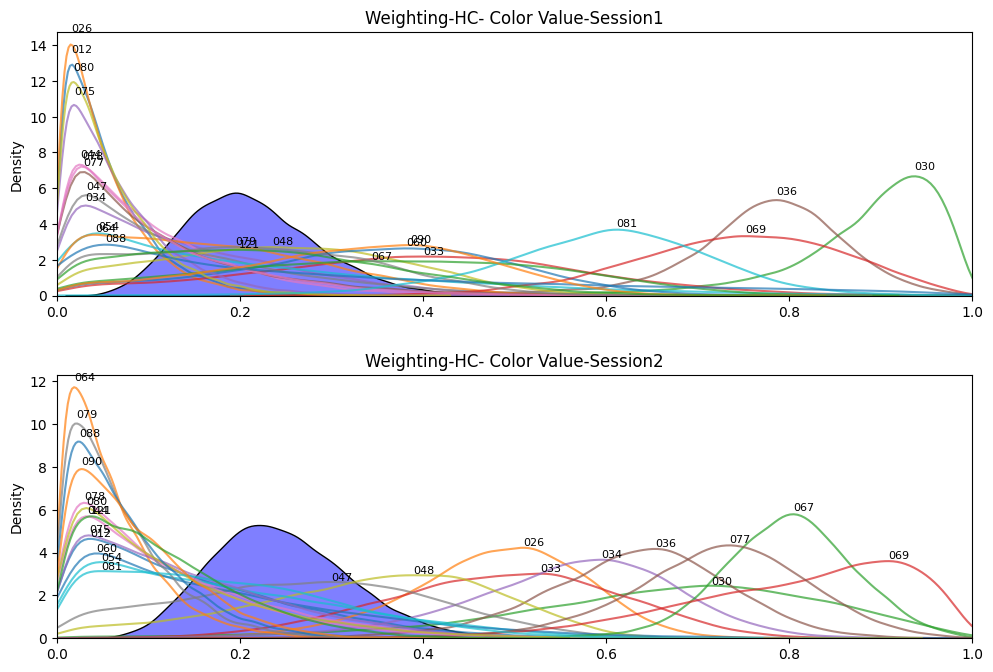

In [8]:
mm = 1/2.54  # centimeters in inches
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(30*mm, 20*mm))
axs = axs.flatten()

############ Healthy Control

# weighting parameter in color value learning
for i in range(transfer_weight_HC.shape[0]):
    # Session 1
    sns.kdeplot(data=transfer_weight_HC[i,0,1], ax=axs[0], alpha=.7)
    map_apex, dens_apex=MAP(transfer_weight_HC[i,0,1])
    sub_name = df[df['patient']=='HC']['sub_ID'].unique()[i]
    axs[0].text(map_apex, dens_apex/14,  sub_name[4:], transform=axs[0].transAxes, fontsize=8)
    # Session 2
    sns.kdeplot(data=transfer_weight_HC[i,1,1], ax=axs[1], alpha=.7)
    map_apex, dens_apex=MAP(transfer_weight_HC[i,1,1])
    sub_name = df[df['patient']=='HC']['sub_ID'].unique()[i]
    axs[1].text(map_apex, dens_apex/12,  sub_name[4:], transform=axs[1].transAxes, fontsize=8)

# hierarchical parametes
sns.kdeplot(data=transfer_hier_weight_mu_HC[0,1], ax=axs[0], multiple="stack", color='blue', alpha=.5)
sns.kdeplot(data=transfer_hier_weight_mu_HC[1,1], ax=axs[1], multiple="stack", color='blue', alpha=.5)


axs[0].set_xlim(0,1)
axs[1].set_xlim(0,1)
axs[0].set_title('Weighting-HC- Color Value-Session1')
axs[1].set_title('Weighting-HC- Color Value-Session2')

fig.subplots_adjust(wspace=.3, hspace=.3)


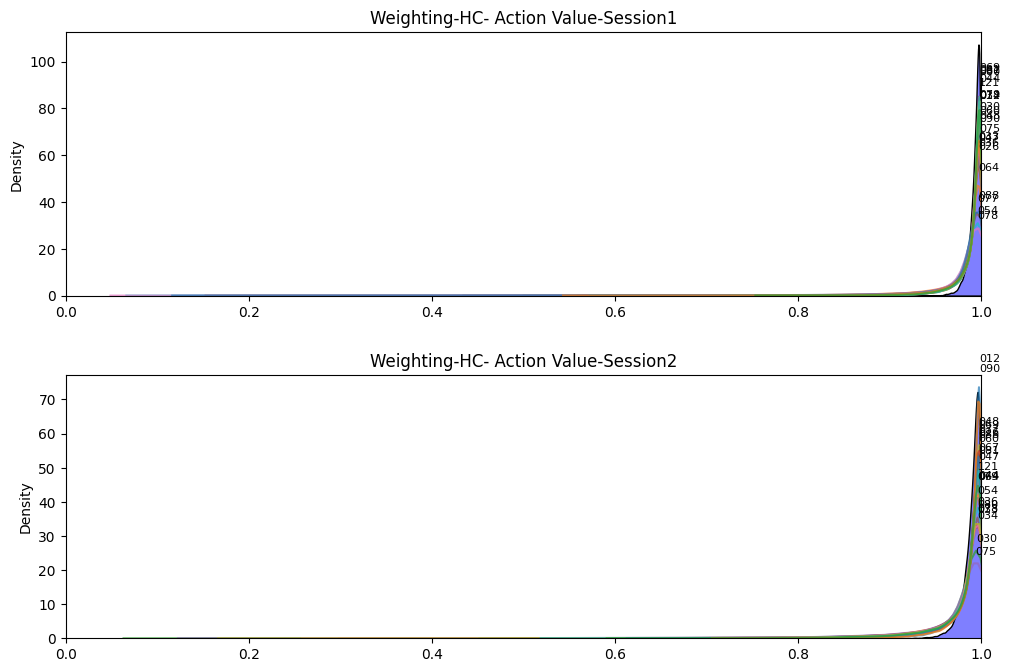

In [9]:
mm = 1/2.54  # centimeters in inches
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(30*mm, 20*mm))
axs = axs.flatten()

############ Healthy Control

# weighting parameter in action value learning
for i in range(transfer_weight_HC.shape[0]):
    # Session1
    sns.kdeplot(data=transfer_weight_HC[i,0,0], ax=axs[0], alpha=.7)
    map_apex, dens_apex=MAP(transfer_weight_HC[i,0,0])
    sub_name = df[df['patient']=='HC']['sub_ID'].unique()[i]
    axs[0].text(map_apex, dens_apex/100,  sub_name[4:], transform=axs[0].transAxes, fontsize=8)
    #session2 
    sns.kdeplot(data=transfer_weight_HC[i,1,0], ax=axs[1], alpha=.7)
    map_apex, dens_apex=MAP(transfer_weight_HC[i,1,0])
    sub_name = df[df['patient']=='HC']['sub_ID'].unique()[i]
    axs[1].text(map_apex, dens_apex/70,  sub_name[4:], transform=axs[1].transAxes, fontsize=8)

# hierarchical parametes
sns.kdeplot(data=transfer_hier_weight_mu_HC[0,0], ax=axs[0], multiple="stack", color='blue', alpha=.5)
sns.kdeplot(data=transfer_hier_weight_mu_HC[1,0], ax=axs[1], multiple="stack", color='blue', alpha=.5)

axs[0].set_xlim(0,1)
axs[1].set_xlim(0,1)
axs[0].set_title('Weighting-HC- Action Value-Session1')
axs[1].set_title('Weighting-HC- Action Value-Session2')

fig.subplots_adjust(wspace=.3, hspace=.3)


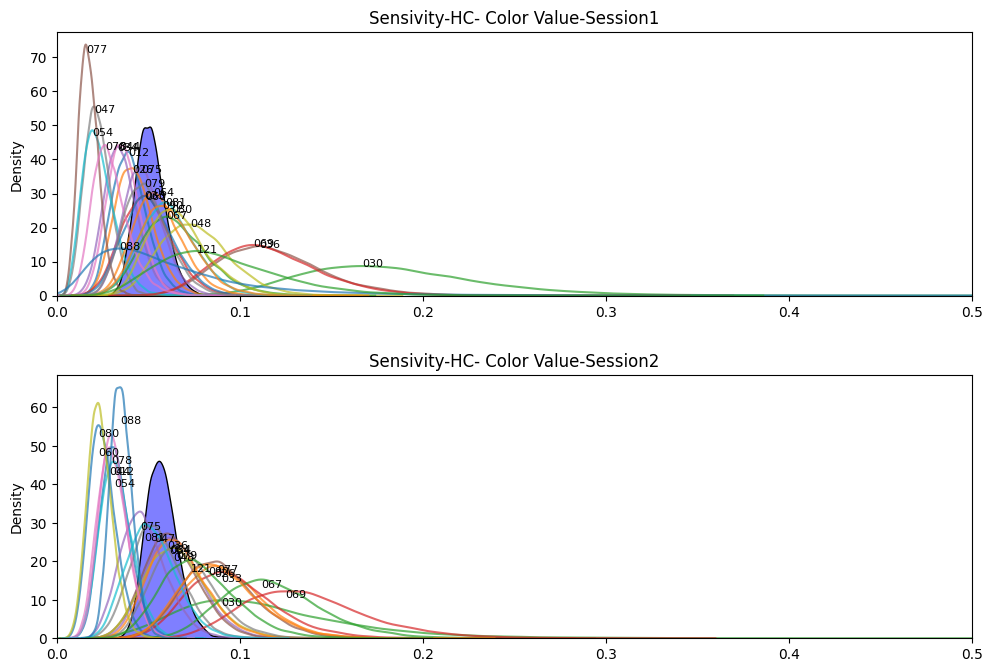

In [31]:
mm = 1/2.54  # centimeters in inches
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(30*mm, 20*mm))
axs = axs.flatten()

############ Healthy Control

# sensivity parameter in color value learning
for i in range(transfer_sensitivity_HC.shape[0]):
    # Session 1
    sns.kdeplot(data=transfer_sensitivity_HC[i,0,1], ax=axs[0], alpha=.7)
    map_apex, dens_apex=MAP(transfer_sensitivity_HC[i,0,1])
    sub_name = df[df['patient']=='HC']['sub_ID'].unique()[i]
    axs[0].text(2*map_apex, dens_apex/80,  sub_name[4:], transform=axs[0].transAxes, fontsize=8)
    # Session 2
    sns.kdeplot(data=transfer_sensitivity_HC[i,1,1], ax=axs[1], alpha=.7)
    map_apex, dens_apex=MAP(transfer_sensitivity_HC[i,1,1])
    sub_name = df[df['patient']=='HC']['sub_ID'].unique()[i]
    axs[1].text(2*map_apex, dens_apex/80,  sub_name[4:], transform=axs[1].transAxes, fontsize=8)

# hierarchical parametes
sns.kdeplot(data=transfer_hier_sensitivity_mu_HC[0,1], ax=axs[0], multiple="stack", color='blue', alpha=.5)
sns.kdeplot(data=transfer_hier_sensitivity_mu_HC[1,1], ax=axs[1], multiple="stack", color='blue', alpha=.5)


axs[0].set_xlim(0,.5)
axs[1].set_xlim(0,.5)
axs[0].set_title('Sensivity-HC- Color Value-Session1')
axs[1].set_title('Sensivity-HC- Color Value-Session2')

fig.subplots_adjust(wspace=.3, hspace=.3)


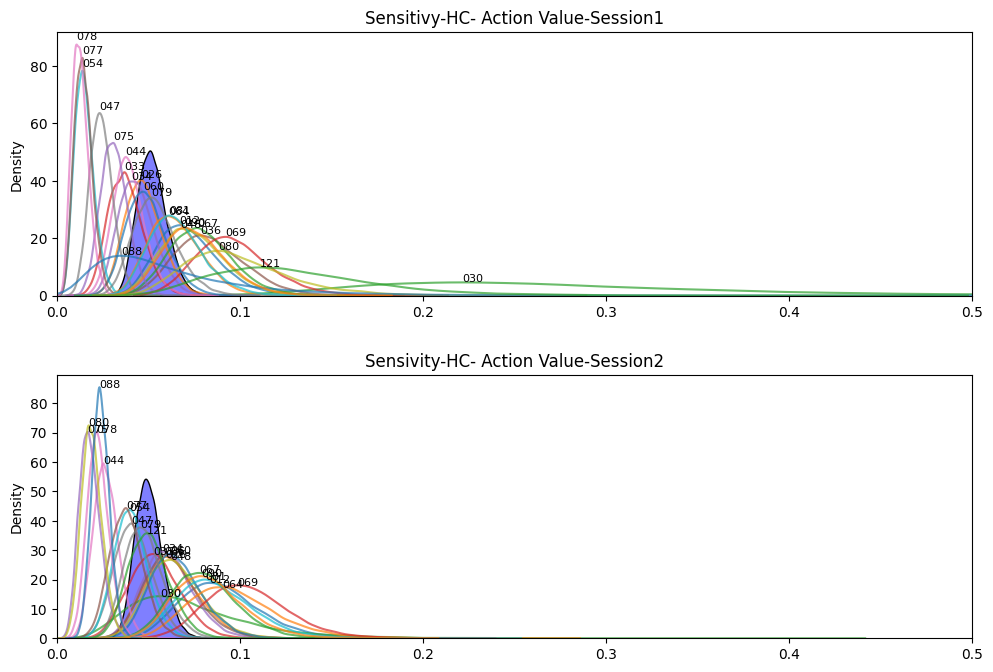

In [33]:
mm = 1/2.54  # centimeters in inches
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(30*mm, 20*mm))
axs = axs.flatten()

############ Healthy Control

# sensitivity parameter in action value learning
for i in range(transfer_sensitivity_HC.shape[0]):
    # Session1
    sns.kdeplot(data=transfer_sensitivity_HC[i,0,0], ax=axs[0], alpha=.7)
    map_apex, dens_apex=MAP(transfer_sensitivity_HC[i,0,0])
    sub_name = df[df['patient']=='HC']['sub_ID'].unique()[i]
    axs[0].text(2*map_apex, dens_apex/90,  sub_name[4:], transform=axs[0].transAxes, fontsize=8)
    #session2 
    sns.kdeplot(data=transfer_sensitivity_HC[i,1,0], ax=axs[1], alpha=.7)
    map_apex, dens_apex=MAP(transfer_sensitivity_HC[i,1,0])
    sub_name = df[df['patient']=='HC']['sub_ID'].unique()[i]
    axs[1].text(2*map_apex, dens_apex/90,  sub_name[4:], transform=axs[1].transAxes, fontsize=8)

# hierarchical parametes
sns.kdeplot(data=transfer_hier_sensitivity_mu_HC[0,0], ax=axs[0], multiple="stack", color='blue', alpha=.5)
sns.kdeplot(data=transfer_hier_sensitivity_mu_HC[1,0], ax=axs[1], multiple="stack", color='blue', alpha=.5)

axs[0].set_xlim(0,.5)
axs[1].set_xlim(0,.5)
axs[0].set_title('Sensitivy-HC- Action Value-Session1')
axs[1].set_title('Sensivity-HC- Action Value-Session2')

fig.subplots_adjust(wspace=.3, hspace=.3)


### Parkinson's disease

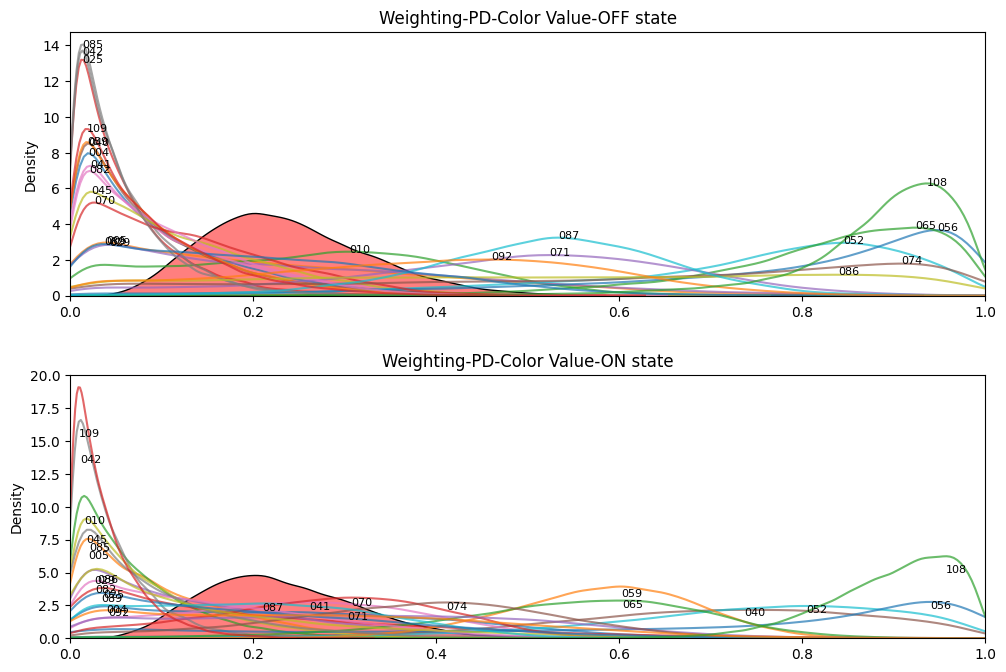

In [9]:
mm = 1/2.54  # centimeters in inches
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(30*mm, 20*mm))
axs = axs.flatten()

############ Parkindson's disease 

# weighting parameter in color value learning
for i in range(transfer_weight_PD.shape[0]):
    #OFF
    sns.kdeplot(data=transfer_weight_PD[i,0,1], ax=axs[0], alpha=.7)
    map_apex, dens_apex=MAP(transfer_weight_PD[i,0,1])
    sub_name = df[df['patient']=='PD']['sub_ID'].unique()[i]
    axs[0].text(map_apex, dens_apex/15,  sub_name[4:], transform=axs[0].transAxes, fontsize=8)
    #ON
    sns.kdeplot(data=transfer_weight_PD[i,1,1], ax=axs[1], alpha=.7)
    map_apex, dens_apex=MAP(transfer_weight_PD[i,1,1])
    sub_name = df[df['patient']=='PD']['sub_ID'].unique()[i]
    axs[1].text(map_apex, dens_apex/25,  sub_name[4:], transform=axs[1].transAxes, fontsize=8)

# hierarchical parametes
sns.kdeplot(data=transfer_hier_weight_mu_PD[0,1], ax=axs[0], multiple="stack", color='red', alpha=.5)
sns.kdeplot(data=transfer_hier_weight_mu_PD[1,1], ax=axs[1], multiple="stack", color='red', alpha=.5)


axs[0].set_xlim(0,1)
axs[1].set_xlim(0,1)
axs[0].set_title('Weighting-PD-Color Value-OFF state')
axs[1].set_title('Weighting-PD-Color Value-ON state')

fig.subplots_adjust(wspace=.3, hspace=.3)


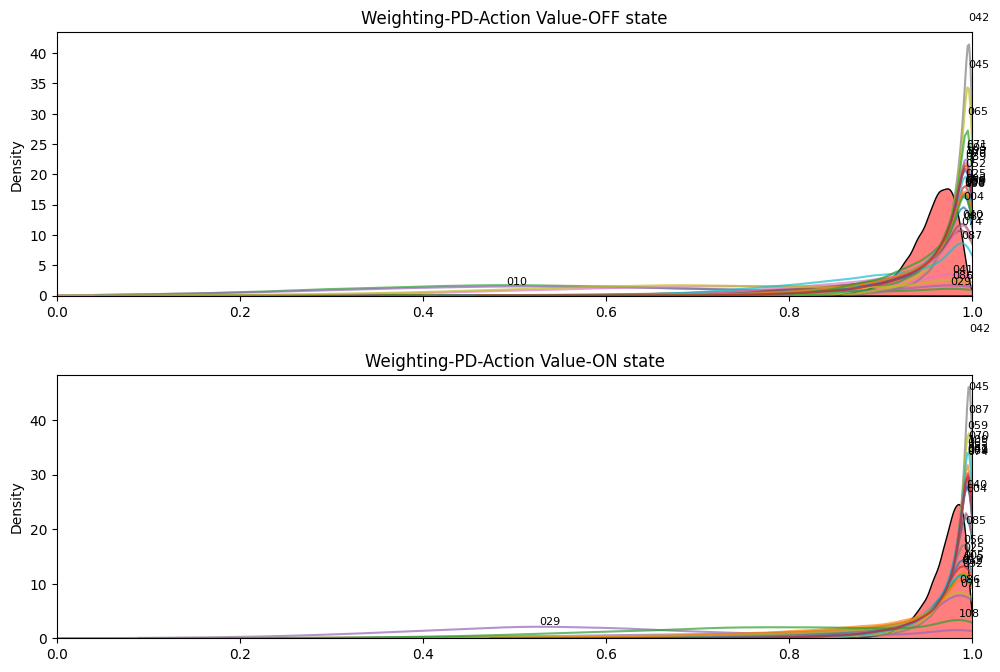

In [15]:
mm = 1/2.54  # centimeters in inches
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(30*mm, 20*mm))
axs = axs.flatten()

############ Parkinson's disease  

# weighting parameter in action value learning
for i in range(transfer_weight_PD.shape[0]):
    # OFF
    sns.kdeplot(data=transfer_weight_PD[i,0,0], ax=axs[0], alpha=.7)
    map_apex, dens_apex=MAP(transfer_weight_PD[i,0,0])
    sub_name = df[df['patient']=='PD']['sub_ID'].unique()[i]
    axs[0].text(map_apex, dens_apex/40,  sub_name[4:], transform=axs[0].transAxes, fontsize=8)
    #ON
    sns.kdeplot(data=transfer_weight_PD[i,1,0], ax=axs[1], alpha=.7)
    map_apex, dens_apex=MAP(transfer_weight_PD[i,1,0])
    sub_name = df[df['patient']=='PD']['sub_ID'].unique()[i]
    axs[1].text(map_apex, dens_apex/40,  sub_name[4:], transform=axs[1].transAxes, fontsize=8)

# hierarchical parametes
sns.kdeplot(data=transfer_hier_weight_mu_PD[0,0], ax=axs[0], multiple="stack", color='red', alpha=.5)
sns.kdeplot(data=transfer_hier_weight_mu_PD[1,0], ax=axs[1], multiple="stack", color='red', alpha=.5)


axs[0].set_xlim(0,1)
axs[1].set_xlim(0,1)
axs[0].set_title('Weighting-PD-Action Value-OFF state')
axs[1].set_title('Weighting-PD-Action Value-ON state')

fig.subplots_adjust(wspace=.3, hspace=.3)


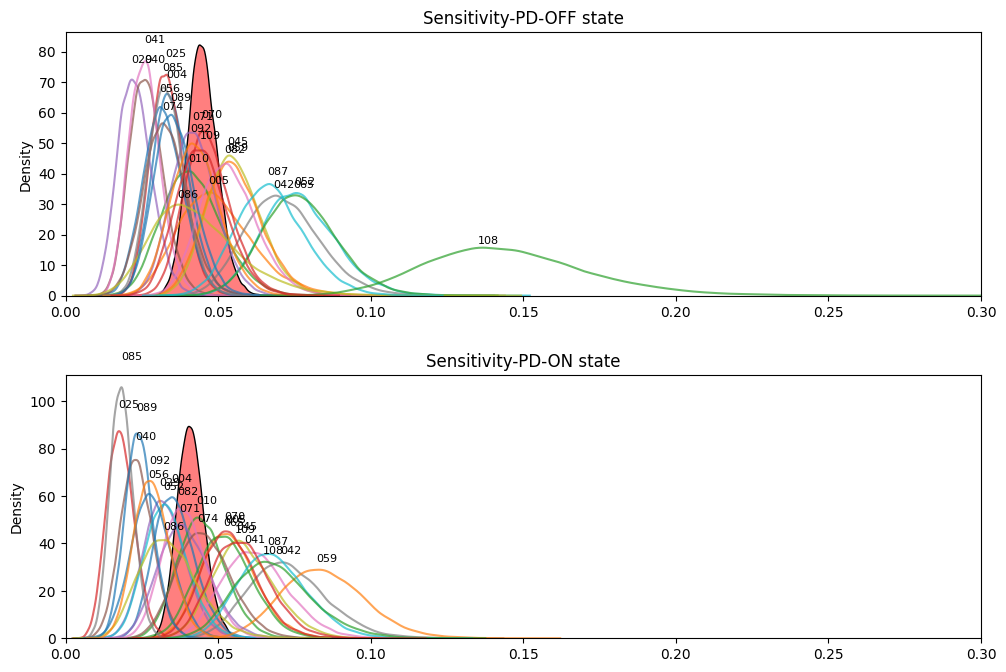

In [14]:
mm = 1/2.54  # centimeters in inches
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(30*mm, 20*mm))
axs = axs.flatten()

############ Parkindson's disease 

# weighting parameter 
for i in range(transfer_sensitivity_PD.shape[0]):
    #OFF
    sns.kdeplot(data=transfer_sensitivity_PD[i,0], ax=axs[0], alpha=.7)
    map_apex, dens_apex=MAP(transfer_sensitivity_PD[i,0])
    sub_name = df[df['patient']=='PD']['sub_ID'].unique()[i]
    axs[0].text(3.3*map_apex, dens_apex/80,  sub_name[4:], transform=axs[0].transAxes, fontsize=8)
    #ON
    sns.kdeplot(data=transfer_sensitivity_PD[i,1], ax=axs[1], alpha=.7)
    map_apex, dens_apex=MAP(transfer_sensitivity_PD[i,1])
    sub_name = df[df['patient']=='PD']['sub_ID'].unique()[i]
    axs[1].text(3.3*map_apex, dens_apex/100,  sub_name[4:], transform=axs[1].transAxes, fontsize=8)

# hierarchical parametes
sns.kdeplot(data=transfer_hier_sensitivity_mu_PD[0], ax=axs[0], multiple="stack", color='red', alpha=.5)
sns.kdeplot(data=transfer_hier_sensitivity_mu_PD[1], ax=axs[1], multiple="stack", color='red', alpha=.5)


axs[0].set_xlim(0,.3)
axs[1].set_xlim(0,.3)
axs[0].set_title('Sensitivity-PD-OFF state')
axs[1].set_title('Sensitivity-PD-ON state')

fig.subplots_adjust(wspace=.3, hspace=.3)


In [24]:
#Outlier of weighting Parameters for HC -Color Value-session1
for i in range(len(transfer_weight_HC)):
    map_apex, dens_apex = MAP(transfer_weight_HC[i,0,1])
    if map_apex>.7:
        print(i, ': ', df[df['patient']=='HC']['sub_ID'].unique()[i])

2 :  sub-030
5 :  sub-036
13 :  sub-069


In [25]:
#Outlier of weighting Parameters for HC -Color Value-session2
for i in range(len(transfer_weight_HC)):
    map_apex, dens_apex = MAP(transfer_weight_HC[i,1,1])
    if map_apex>.7:
        print(i, ': ', df[df['patient']=='HC']['sub_ID'].unique()[i])

12 :  sub-067
13 :  sub-069


In [26]:
#Outlier of weighting Parameters for PD -Color Value-OFF
for i in range(len(transfer_weight_PD)):
    map_apex, dens_apex = MAP(transfer_weight_PD[i,0,1])
    if map_apex>.7:
        print(i, ': ', df[df['patient']=='PD']['sub_ID'].unique()[i])

9 :  sub-052
10 :  sub-056
12 :  sub-065
22 :  sub-108


In [27]:
#Outlier of weighting Parameters for PD -Color Value-ON
for i in range(len(transfer_weight_PD)):
    map_apex, dens_apex = MAP(transfer_weight_PD[i,1,1])
    if map_apex>.7:
        print(i, ': ', df[df['patient']=='PD']['sub_ID'].unique()[i])

5 :  sub-040
9 :  sub-052
10 :  sub-056
22 :  sub-108


In [28]:
#Outlier of weighting Parameters for PD -Action Value-OFF
for i in range(len(transfer_weight_PD)):
    map_apex, dens_apex = MAP(transfer_weight_PD[i,0,0])
    if map_apex<.3:
        print(i, ': ', df[df['patient']=='PD']['sub_ID'].unique()[i])

In [ ]:
#Outlier of weighting Parameters for PD -Action Value-OFF
for i in range(len(transfer_weight_PD)):
    map_apex, dens_apex = MAP(transfer_weight_PD[i,0,0])
    if map_apex<.3:
        print(i, ': ', df[df['patient']=='PD']['sub_ID'].unique()[i])

: 